In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
class Preprocessing:
    def __init__(self, filepath):
        self.filepath = filepath

    #1) Read Data: This is to read the Joensuu text file specifically
    def read_data(self):
        read = open(self.filepath, "r")
        content = read.readlines()
        data_array = np.empty((len(content), 2)) #Create an empty array to store the lat and lon
        if(len(content) == 0):
            return
        else:
            for line in range(len(content)):
                lat, lon = str(content[line].rstrip()).split(" ")
                content[line] = lat + ","  + lon
                data_array[line, 0] = float(lat)
                data_array[line, 1] = float(lon)
            return data_array
        read.close()

    #2) Select features: Select the relevant features from the dataset to be used.
    # Here it is the Latitide and Longitude which we already have

    #3) Standardize. Here use the mean and std dev to detect the global outliers
    def standardize_data(self, data):
        data_copy = data.copy()

        rows = data.shape[0]
        cols = data.shape[1]
        #do this for each column in the matrix
        for i in range(cols):
            col_mean = np.mean(data[:, i])
            col_std = np.std(data[:, i])

            #Iterate through the rows in that column
            for j in range(rows):
                #apply the standardization formula to each cell: x_std =  (x - col_mean) / col_std
                data_copy[j, i] = (data[j, i] - col_mean) / col_std

        return data_copy
    
    #4) Detect global outliers

    #5) Normalise the standardized data from (-3, 3) to (0, 1)
    def normalise_data(self, data):
        data_copy = data.copy()

        rows = data.shape[0]
        cols = data.shape[1]
        #do this for each column in the matrix
        for i in range(cols):
            col_max = np.amax(data[:, i])
            col_min = np.amin(data[:, i])

            #Iterate through the rows in that column
            for j in range(rows):
                #apply the normalisation range(0, 1) formula to each cell: x_norm =  (x - col_min) / (col_max - col_min)
                data_copy[j, i] = (data[j, i] - col_min) / (col_max - col_min)
        return data_copy

    #6) Carry out PCA to ortogonalize the components so that they are uncorrelated
#     def PCA(self, data):


    def plot(self, data):
        fig, ax = plt.subplots()
        # fig.set_size_inches(5, 5)
        ax.plot(data[:,0], data[:, 1], ".", color="green", alpha=0.5)
        ax.set_ylabel("Longitude")
        ax.set_ylabel("Latitude")
        ax.set_title("Longitide vs Latitude")
        fig.tight_layout()

        plt.show()

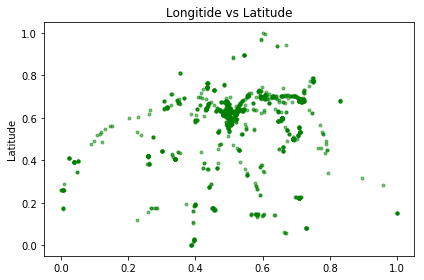

In [8]:
test = Preprocessing("Joensuu.txt")
dataset = test.read_data()
standardised_data = test.standardize_data(dataset)
normalised_data = test.normalise_data(standardised_data)
test.plot(normalised_data)

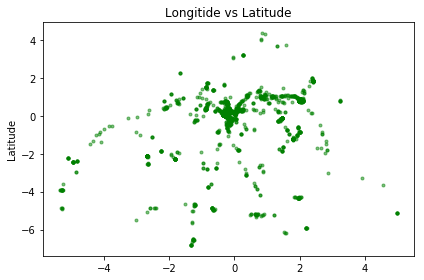

In [9]:
test.plot(standardised_data)